<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/qo20b88v1hbjztubt06609ovs85q8fau.png" width="400px" align="center"></a>

<h1 align="center"><font size="5">AUTOENCODERS</font></h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
Welcome to this notebook about autoencoders.
<font size="3"><strong>In this notebook you will find an explanation of what is an autoencoder, how it works, and see an implementation of an autoencoder in TensorFlow.</strong></font>
<br>
<br>
<h2>Table of Contents</h2>
<ol>
 <li><a href="#ref1">Introduction</a></li>
 <li><a href="#ref2">Feature Extraction and Dimensionality Reduction</a></li>
 <li><a href="#ref3">Autoencoder Structure</a></li>
 <li><a href="#ref4">Performance</a></li>
 <li><a href="#ref5">Training: Loss Function</a></li>
 <li><a href="#ref6">Code</a></li>
</ol>
</div>
<br>
By the end of this notebook, you should be able to create simple autoencoders and how to apply them to problems that involves unsupervised learning.
<br>
<p></p>
<hr>

<a id="ref1"></a>
<h2>Introduction</h2>
An autoencoder, also known as autoassociator or Diabolo networks, is an artificial neural network employed to recreate the given input.
It takes a set of <b>unlabeled</b> inputs, encodes them and then tries to extract the most valuable information from them.
They are used for feature extraction, learning generative models of data, dimensionality reduction and can be used for compression. 

A 2006 paper named <b><a href="https://www.cs.toronto.edu/~hinton/science.pdf">Reducing the Dimensionality of Data with Neural Networks</a>, done by G. E. Hinton and R. R. Salakhutdinov</b>, showed better results than years of refining other types of network, and was a breakthrough in the field of Neural Networks, a field that was "stagnant" for 10 years.

Now, autoencoders, based on Restricted Boltzmann Machines, are employed in some of the largest deep learning applications. They are the building blocks of Deep Belief Networks (DBN).

<center><img src="https://ibm.box.com/shared/static/xlkv9v7xzxhjww681dq3h1pydxcm4ktp.png" style="width: 350px;"></center>

<hr>

<a id="ref2"></a>
<h2>Feature Extraction and Dimensionality Reduction</h2>

An example given by Nikhil Buduma in KdNuggets (<a href="http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html">link</a>) which gave an excellent explanation of the utility of this type of Neural Network.

Say that you want to extract what emotion the person in a photography is feeling. Using the following 256x256 pixel grayscale picture as an example:

<img src="https://ibm.box.com/shared/static/r5knpow4bk2farlvxia71e9jp2f2u126.png">

But when use this picture we start running into a bottleneck! Because this image being 256x256 pixels in size correspond with an input vector of 65536 dimensions! If we used an image produced with conventional cellphone cameras, that generates images of 4000 x 3000 pixels, we would have 12 million dimensions to analyze.


This bottleneck is further problematized as the difficulty of a machine learning problem is increased as more dimensions are involved. According to a 1982 study by C.J. Stone (<a href="http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf">link</a>), the time to fit a model, is optimal if:

<br><br>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3><strong>$$m^{-p/(2p+d)}$$</strong></h3>
<br>
Where:
<br>
m: Number of data points
<br>
d: Dimensionality of the data
<br>
p: Parameter that depends on the model
</div>

As you can see, it increases exponentially!
Returning to our example, we don't need to use all of the 65,536 dimensions to classify an emotion. A human identify emotions according to some specific facial expression, some <b>key features</b>, like the shape of the mouth and eyebrows.

<center><img src="https://ibm.box.com/shared/static/m8urvuqujkt2vt1ru1fnslzh24pv7hn4.png" height="256" width="256"></center>

<hr>

<a id="ref3"></a>
<h2>Autoencoder Structure</h2>

<img src="https://ibm.box.com/shared/static/no7omt2jhqvv7uuls7ihnzikyl9ysnfp.png" style="width: 400px;">

An autoencoder can be divided in two parts, the <b>encoder</b> and the <b>decoder</b>.

The encoder needs to compress the representation of an input. In this case we are going to reduce the dimension the face of our actor, from 2000 dimensions to only 30 dimensions, by running the data through layers of our encoder.

The decoder works like encoder network in reverse. It works to recreate the input, as closely as possible. This plays an important role during training, because it forces the autoencoder to select the most important features in the compressed representation.


<hr>

<a id="ref4"></a>
<h2>Performance</h2>

After the training has been done, you can use the encoded data as a reliable dimensionally-reduced data, applying it to any problems where dimensionality reduction seems appropriate.

<img src="https://ibm.box.com/shared/static/yt3xyon4g2jyw1w9qup1mvx7cgh28l64.png">

This image was extracted from the G. E. Hinton and R. R. Salakhutdinovcomparing's <a href="https://www.cs.toronto.edu/~hinton/science.pdf">paper</a>, on the two-dimensional reduction for 500 digits of the MNIST, with PCA on the left and autoencoder on the right. We can see that the autoencoder provided us with a better separation of data.

<hr>

<a id="ref5"></a>
<h2>Training: Loss function</h2>

An autoencoder uses the Loss function to properly train the network. The Loss function will calculate the differences between our output and the expected results. After that, we can minimize this error with gradient descent. There are more than one type of Loss function, it depends on the type of data.

<h3>Binary Values:</h3>
$$l(f(x)) = - \sum_{k} (x_k log(\hat{x}_k) + (1 - x_k) \log (1 - \hat{x}_k) \ )$$

For binary values, we can use an equation based on the sum of Bernoulli's cross-entropy. 

$x_k$ is one of our inputs and $\hat{x}_k$ is the respective output.

We use this function so that if $x_k$ equals to one, we want to push $\hat{x}_k$ as close as possible to one. The same if $x_k$ equals to zero.

If the value is one, we just need to calculate the first part of the formula, that is, $- x_k log(\hat{x}_k)$. Which, turns out to just calculate $- log(\hat{x}_k)$.

And if the value is zero, we need to calculate just the second part, $(1 - x_k) \log (1 - \hat{x}_k) \ )$ - which turns out to be $log (1 - \hat{x}_k) $.



<h3>Real values:</h3>
$$l(f(x)) = - \frac{1}{2}\sum_{k} (\hat{x}_k- x_k \ )^2$$

As the above function would behave badly with inputs that are not 0 or 1, we can use the sum of squared differences for our Loss function. If you use this loss function, it's necessary that you use a linear activation function for the output layer.

As it was with the above example, $x_k$ is one of our inputs and $\hat{x}_k$ is the respective output, and we want to make our output as similar as possible to our input.

<h3>Loss Gradient:</h3>

$$\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))  = \hat{x}^{(t)} - x^{(t)} $$

We use the gradient descent to reach the local minimum of our function $l( \ f(x^{(t)})$, taking steps towards the negative of the gradient of the function in the current point.

Our function about the gradient $(\nabla_{\hat{a}(x^{(t)})})$ of the loss of $l( \ f(x^{(t)})$ in the preactivation of the output layer.

It's actually a simple formula, it is done by calculating the difference between our output $\hat{x}^{(t)}$ and our input $x^{(t)}$.

Then our network backpropagates our gradient $\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))$ through the network using <b>backpropagation</b>.

<hr>

<a id="ref6"></a>
<h2>Code</h2>

For this part, we walk through a lot of Python 2.7.11 code. We are going to use the MNIST dataset for our example.
The following code was created by Aymeric Damien. You can find some of his code in <a href="https://github.com/aymericdamien">here</a>. We made some modifications for us to import the datasets to Jupyter Notebooks.

Let's call our imports and make the MNIST data available to use.

In [1]:
#from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

Now, let's give the parameters that are going to be used by our NN.

In [2]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

Now we need to create our encoder. For this, we are going to use sigmoidal functions. Sigmoidal functions delivers great results with this type of network. This is due to having a good derivative that is well-suited to backpropagation. We can create our encoder using the sigmoidal function like this:

In [3]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

And the decoder:

You can see that the layer_1 in the encoder is the layer_2 in the decoder and vice-versa.

In [4]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

Let's construct our model.
In the variable <code>cost</code> we have the loss function and in the <code>optimizer</code> variable we have our gradient used for backpropagation.

In [5]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Reconstructed Images
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

For training we will run for 20 epochs.

In [6]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

Epoch: 0001 cost= 0.186883807
Epoch: 0002 cost= 0.164871678
Epoch: 0003 cost= 0.135991439
Epoch: 0004 cost= 0.131798148
Epoch: 0005 cost= 0.130778551
Epoch: 0006 cost= 0.121999137
Epoch: 0007 cost= 0.117076397
Epoch: 0008 cost= 0.111149974
Epoch: 0009 cost= 0.105409071
Epoch: 0010 cost= 0.104820408
Epoch: 0011 cost= 0.098532274
Epoch: 0012 cost= 0.096639000
Epoch: 0013 cost= 0.095570952
Epoch: 0014 cost= 0.094599970
Epoch: 0015 cost= 0.090456493
Epoch: 0016 cost= 0.089751303
Epoch: 0017 cost= 0.089181587
Epoch: 0018 cost= 0.087490588
Epoch: 0019 cost= 0.087518871
Epoch: 0020 cost= 0.084451094
Optimization Finished!


Now, let's apply encoder and decoder for our tests.

In [7]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

Let's simply visualize our graphs!

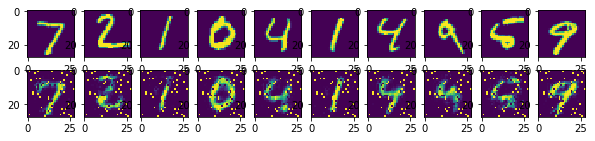

In [8]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

As you can see, the reconstructions were successful. It can be seen that some noise were added to the image.

<hr>

## Want to learn more?

Running deep learning programs usually needs a high performance platform. __PowerAI__ speeds up deep learning and AI. Built on IBM’s Power Systems, __PowerAI__ is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The __PowerAI__ platform supports popular machine learning libraries and dependencies including TensorFlow, Caffe, Torch, and Theano. You can use [PowerAI on IMB Cloud](https://cocl.us/ML0120EN_PAI).

Also, you can use __Watson Studio__ to run these notebooks faster with bigger datasets.__Watson Studio__ is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, __Watson Studio__ enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of __Watson Studio__ users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX).This is the end of this lesson. Thank you for reading this notebook, and good luck on your studies.

### Thanks for completing this lesson!

Created by <a href="https://www.linkedin.com/in/franciscomagioli">Francisco Magioli</a>, <a href="https://ca.linkedin.com/in/erich-natsubori-sato">Erich Natsubori Sato</a>, <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

### References:
- https://en.wikipedia.org/wiki/Autoencoder
- http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/
- http://www.slideshare.net/billlangjun/simple-introduction-to-autoencoder
- http://www.slideshare.net/danieljohnlewis/piotr-mirowski-review-autoencoders-deep-learning-ciuuk14
- https://cs.stanford.edu/~quocle/tutorial2.pdf
- https://gist.github.com/hussius/1534135a419bb0b957b9
- http://www.deeplearningbook.org/contents/autoencoders.html
- http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html/
- https://www.youtube.com/watch?v=xTU79Zs4XKY
- http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).